**Task 1**

In [ ]:
# importing tensorflow
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# URL of the UCI Heart Disease Prediction Dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Listing the feature names in the dataset
feature_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
"thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
# Reading the features data from the .csv file through the specified URL
data = pd.read_csv(url, names=feature_names, na_values="?")
# Handling missing values: simply dropping rows with missing values
data = data.dropna()
# Convert the target variable to a binary variable (1 for heart disease, 0 for no heart disease)
data["target_binary"] = data["target"].map(lambda x: 1 if x > 0 else 0)
# Listing the names of categorical features in the dataset
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca",
"thal"]
# Applying one-hot encoding to categorical features
encoded_data = pd.get_dummies(data, columns=categorical_features)
# Separate features and target variable
X = encoded_data.drop(["target", "target_binary"], axis=1)
# Assigning "target_binary" feature as output variable
y_binary = data["target_binary"]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3,
random_state=1)
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(64, activation='relu',
input_shape=(X_train_scaled.shape[1],)),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
batch_size = 32
epochs = 10
model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
7/7 [==============================] - 2s 6ms/step - loss: 0.7157 - accuracy: 0.4783
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 0.5898 - accuracy: 0.6570
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5044 - accuracy: 0.7633
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4455 - accuracy: 0.8261
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4035 - accuracy: 0.8309
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3765 - accuracy: 0.8551
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3559 - accuracy: 0.8647
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3385 - accuracy: 0.8647
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3268 - accuracy: 0.8647
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 0.3156 - accuracy: 0.8744


In [ ]:
# Evaluate the model on the test set
loss_and_metrics = model.evaluate(X_test_scaled, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

3/3 [==============================] - 1s 9ms/step - loss: 0.4068 - accuracy: 0.8222
Loss =  0.4067959189414978
Accuracy =  0.8222222328186035


In [ ]:
# Generate and plot the confusion matrix
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int) # Convert probabilities to binary predictions
conf_matrix = confusion_matrix(y_test, y_pred_binary)

3/3 [==============================] - 0s 8ms/step


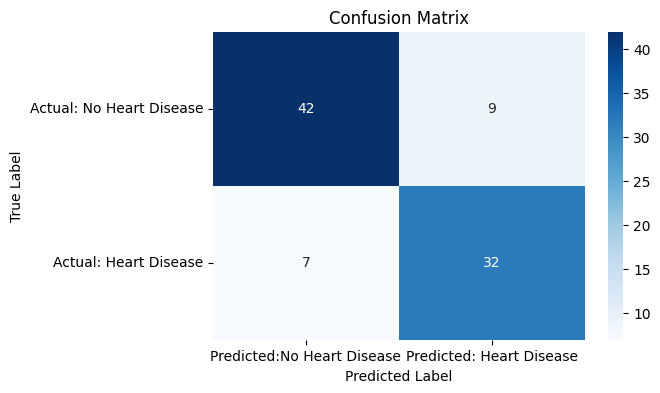

In [ ]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=["Predicted:No Heart Disease", "Predicted: Heart Disease"],yticklabels=["Actual: No Heart Disease", "Actual: Heart Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Task 2**

In [ ]:
# importing tensorflow
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# URL of the UCI Heart Disease Prediction Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"


In [ ]:
# Listing the feature names in the dataset
feature_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                 "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [ ]:
# Reading the features data from the .csv file through the specified URL
data = pd.read_csv(url, names=feature_names, na_values="?")

In [ ]:
# Handling missing values: simply dropping rows with missing values
data = data.dropna()

In [ ]:
# Convert the target variable to multi-class categories (0, 1, 2, 3, 4)
data["target"] = data["target"].astype(int)

In [ ]:
# Listing the names of categorical features in the dataset
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Applying one-hot encoding to categorical features
encoded_data = pd.get_dummies(data, columns=categorical_features)

# Separate features and target variable
X = encoded_data.drop(["target"], axis=1)
y = data["target"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the target variable to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [ ]:
# Neural network model for multi-class classification
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(5, activation='softmax')  # Use 'softmax' activation for multi-class
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
batch_size = 32
epochs = 10
model.fit(X_train_scaled, y_train_one_hot, batch_size=batch_size, epochs=epochs)

# Evaluate the model on the test set
loss_and_metrics = model.evaluate(X_test_scaled, y_test_one_hot)
print('Loss = ', loss_and_metrics[0])
print('Accuracy = ', loss_and_metrics[1])

Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 2.0100 - accuracy: 0.0870
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 1.7674 - accuracy: 0.2077
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 1.5681 - accuracy: 0.3623
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 1.4077 - accuracy: 0.5024
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 1.2821 - accuracy: 0.5604
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 1.1798 - accuracy: 0.5942
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 1.1001 - accuracy: 0.6087
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 1.0395 - accuracy: 0.6135
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 0.9896 - accuracy: 0.6473
Epoch 10/10
3/3 [==============================] - 0s 6ms/step - loss: 1.0611 - accuracy: 0.5889
Loss =  1.061091661453247
Accuracy =  0

In [ ]:
# Generate and plot the confusion matrix
y_pred = model.predict(X_test_scaled)
y_pred_labels = tf.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_labels)

3/3 [==============================] - 0s 6ms/step


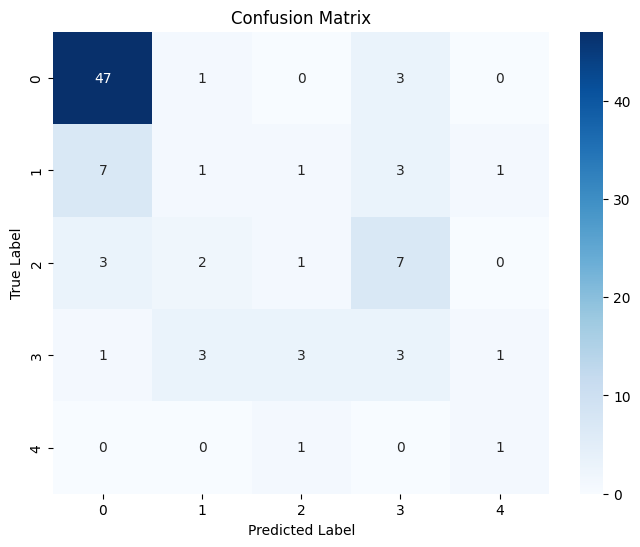

In [ ]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2", "3", "4"],
            yticklabels=["0", "1", "2", "3", "4"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Task 3**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
# Define the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # 10 output classes for digits 0 to 9
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2973 - accuracy: 0.9137 - val_loss: 0.1458 - val_accuracy: 0.9560
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1461 - accuracy: 0.9572 - val_loss: 0.1080 - val_accuracy: 0.9685
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1081 - accuracy: 0.9674 - val_loss: 0.0900 - val_accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0888 - accuracy: 0.9726 - val_loss: 0.0763 - val_accuracy: 0.9762
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0759 - accuracy: 0.9759 - val_loss: 0.0731 - val_accuracy: 0.9783
313/313 - 1s - loss: 0.0731 - accuracy: 0.9783 - 1s/epoch - 4ms/step

Test accuracy: 0.9782999753952026


In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_labels = tf.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_labels))

313/313 [==============================] - 3s 8ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Confusion Matrix:
 [[ 971    1    0    2    0    1    2    1    1    1]
 [   0 1128    3    0    0    1    2    0    1    0]
 [   5    2 1003    3    1    0    

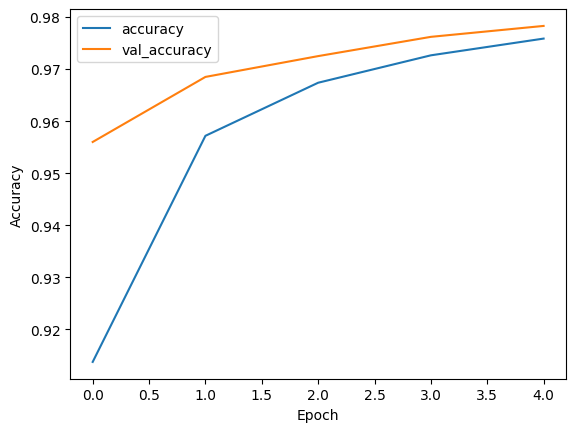

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()